## Import Libraries

In [4]:
import pandas as pd
import numpy as np
import copy
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

## Generate Dataset

    x   y
0  12  39
1  20  36
2  28  30
3  18  52
4  29  54


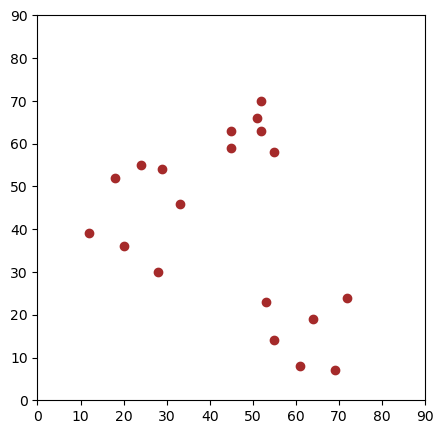

In [38]:
# Generate a list of 2D data points on the plane
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})
print(df.head())

# Plot the dataset
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='brown')
plt.xlim(0, 90)
plt.ylim(0, 90)
plt.show()

## Choose Seeds

{1: [26, 16], 2: [68, 42], 3: [55, 76]}


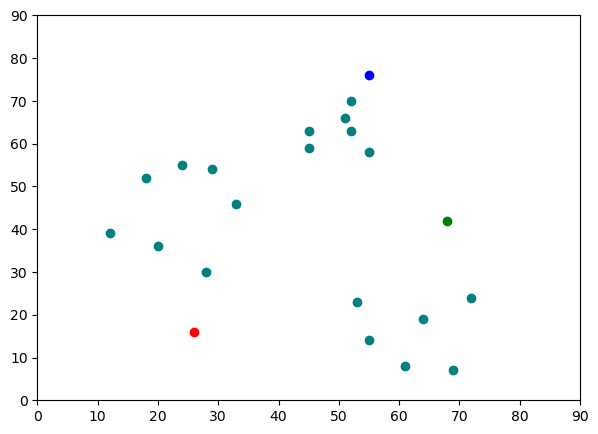

In [39]:
# Specify how many clusters we want to find, 3 in this case
k = 3

# Randomly select a seed centroid for each cluster, the coordinate range for each seed is within 0 and 80
np.random.seed(200)
centroids = {i+1: [np.random.randint(0, 90), np.random.randint(0, 90)] for i in range(k)}
print(centroids)

# Plot the dataset and the initial seeds
fig = plt.figure(figsize=(7, 5))
plt.scatter(df['x'], df['y'], color='teal')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 90)
plt.ylim(0,90)
plt.show()

## Assign Clusters

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        26.925824        56.080300        56.727418        1     r
1  20  36        20.880613        48.373546        53.150729        1     r
2  28  30        14.142136        41.761226        53.338541        1     r
3  18  52        36.878178        50.990195        44.102154        1     r
4  29  54        38.118237        40.804412        34.058773        3     b


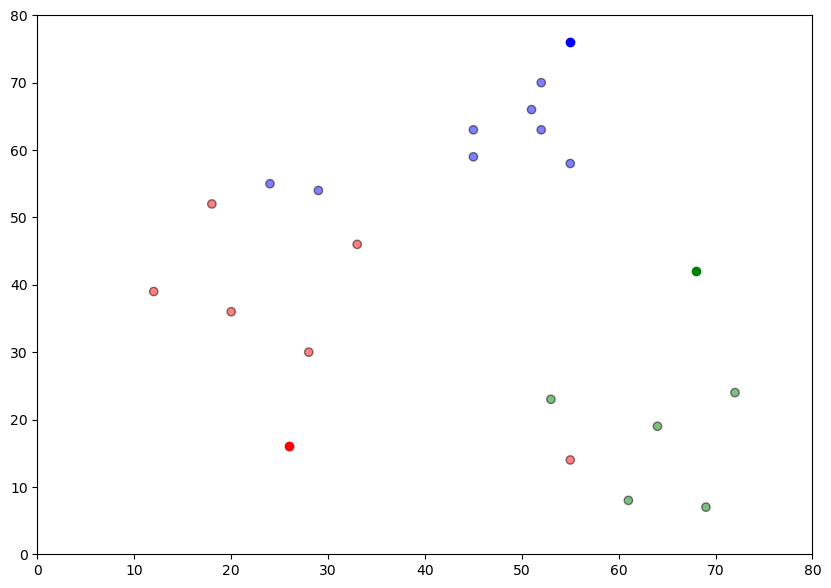

In [40]:
# Implement the cluster membership assignment according to Euclidean distances
def assignment(df, centroids):
    # For each current centroid
    for i in centroids.keys():
        # Calculate the Euclidean distance from it to all the data points
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    
    # Find the closest cluster centroid from each data point
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    
    # Set a different plot color for each cluster
    df['color'] = df['closest'].map(lambda x: colmap[x])
    
    return df

# Run the 1st iteration of cluster membership assignment
df = assignment(df, centroids)
print(df.head())

# Plot the dataset and cluster centroids using their indicative color
fig = plt.figure(figsize=(10, 7))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

## Update Centroids

{1: [27.666666666666668, 36.166666666666664], 2: [63.8, 16.2], 3: [44.125, 61.0]}


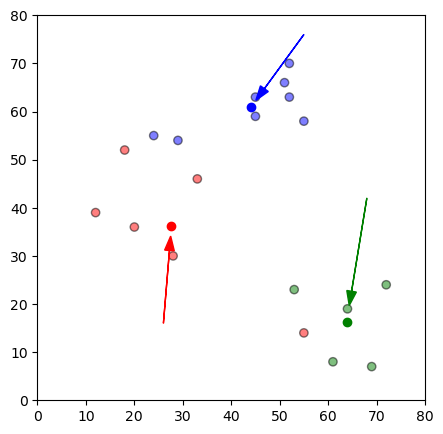

In [41]:
# Backup the previous record of cluster centroids
old_centroids = copy.deepcopy(centroids)

# Implement the update function
def update(centroids):
    # For each cluster centroid
    for i in centroids.keys():
        # Update its coordinates (x,y) to the mean of the data points belonging to that cluster
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return centroids

# Run the 1st iteration of centroids update using the previously assigned cluster membership
centroids = update(centroids)
print(centroids)

# Plot the dataset and the new centroids
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)

# And also plot an arrow from each old centroid to its current updated coordinates
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

## Repeat Assignemnt

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        15.920811        56.595760        38.936045        1     r
1  20  36         7.668478        48.067453        34.742130        1     r
2  28  30         6.175669        38.367695        34.943034        1     r
3  18  52        18.550981        58.131575        27.631786        1     r
4  29  54        17.883108        51.379763        16.666302        3     b


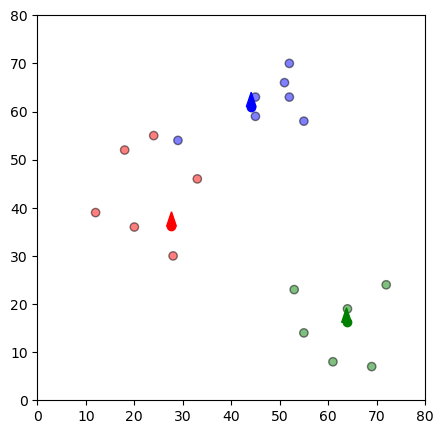

In [42]:
# Plot movement again
kinda_old_centroids = copy.deepcopy(centroids)

# Run the 2nd iteration of cluster membership assignment using the previously updated centroids
df = assignment(df, centroids)
print(df.head())

# Plot the results
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
    

plt.xlim(0, 80)
plt.ylim(0, 80)

for i in kinda_old_centroids.keys():
    old_x = kinda_old_centroids[i][0]
    old_y = kinda_old_centroids[i][1]
    dx = (centroids[i][0] - kinda_old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - kinda_old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
    
plt.show()

## Repeat Until Convergence

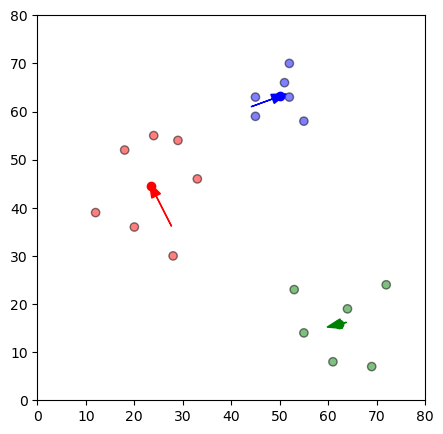

In [43]:
# Continue until all assigned categories don't change any more
while True:
    # Backup the current cluster membership
    closest_centroids = df['closest'].copy(deep=True)
    
    # Update the centroids
    centroids = update(centroids)
    
    # Update the cluster membership
    df = assignment(df, centroids)
    
    # Test if the previous and the updated cluster membership differ
    if closest_centroids.equals(df['closest']):
        # If not, then it means convergence has been reached
        break

# Plot the results
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)

for i in kinda_old_centroids.keys():
    old_x = kinda_old_centroids[i][0]
    old_y = kinda_old_centroids[i][1]
    dx = (centroids[i][0] - kinda_old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - kinda_old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

## K-Means using Scikit-Learn

[[50.         63.16666667]
 [62.33333333 15.83333333]
 [23.42857143 44.57142857]]
[2 2 2 2 2 2 2 0 0 0 0 0 0 1 1 1 1 1 1]


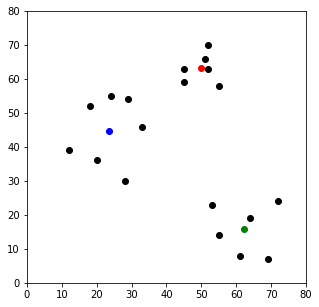

In [17]:
# Obtain a fresh version of the same dataset as above
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

# Run K-Means to find 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

# Get the final centroids
centroids = kmeans.cluster_centers_
print(centroids)

# Predict the cluster membership of each data point based on its Euclidean distance from the centroids
labels = kmeans.predict(df)
print(labels)

# Plot the results
fig = plt.figure(figsize=(5, 5))
colmap = {1: 'r', 2: 'g', 3: 'b'}
plt.scatter(df['x'], df['y'], color='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()